# Diabetes Prediction Using Machine Learning 

## Importing Libraries  

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Reading Dataset

In [18]:
data = pd.read_csv('diabetes.csv')

## Display Top 5 Rows of the dataset

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


##  Check Last 5 Rows of The Dataset

In [20]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


## Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [21]:
data.shape

(2000, 9)

In [22]:
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 2000
Number of Columns: 9


## Get Overall Statistics About The Outcome

In [23]:
data["Outcome"].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

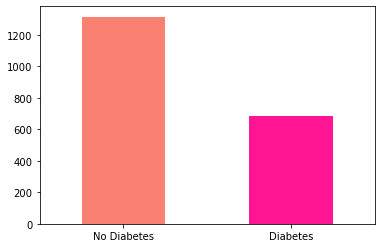

In [24]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [25]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data["Outcome"]==0)]
df_minority = data[(data["Outcome"]==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1300, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled,df_majority]) # upsample minority class

In [26]:
data = df_upsampled

In [27]:
len(data)

2616

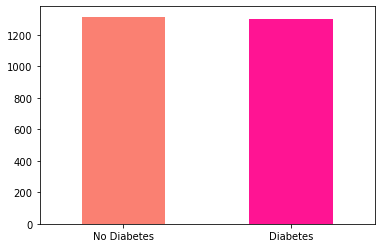

In [28]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

## Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 296 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2616 non-null   int64  
 1   Glucose                   2616 non-null   int64  
 2   BloodPressure             2616 non-null   int64  
 3   SkinThickness             2616 non-null   int64  
 4   Insulin                   2616 non-null   int64  
 5   BMI                       2616 non-null   float64
 6   DiabetesPedigreeFunction  2616 non-null   float64
 7   Age                       2616 non-null   int64  
 8   Outcome                   2616 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 204.4 KB


## Comparing Glucose with the Outcome 

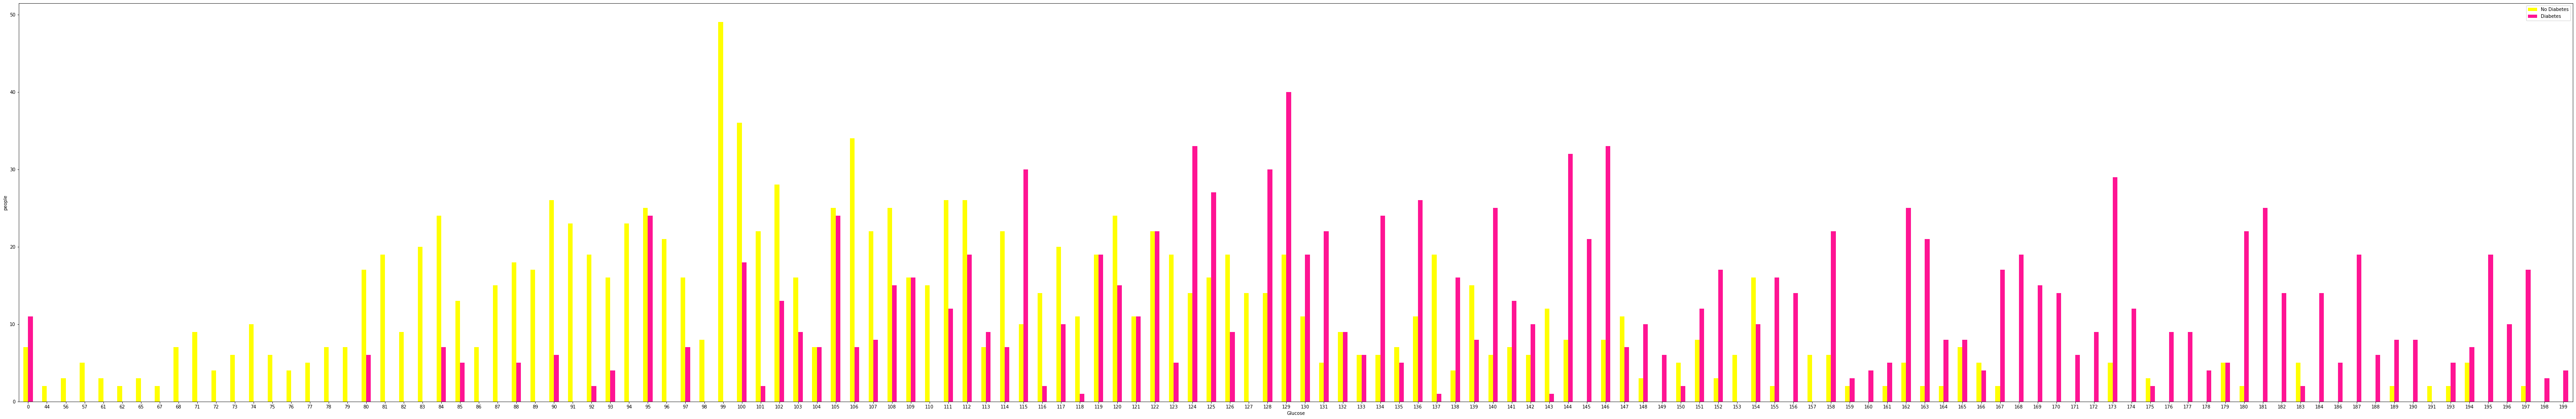

In [30]:
pd.crosstab(data.Glucose,data.Outcome).plot(kind="bar",figsize=(100,16),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

## Finding out the Blood Pressure and age of entries who have diabetes

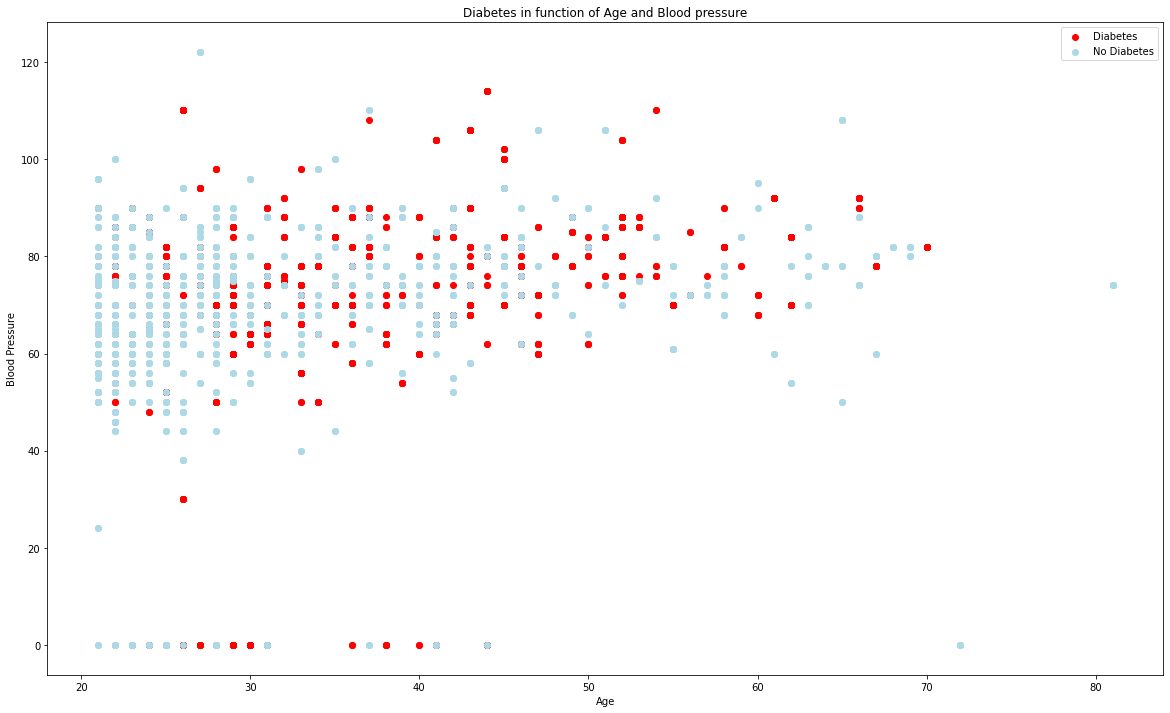

In [31]:
plt.figure(figsize=(20,12))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

## Histogram of all coloumns when the Outcome is 1(Diabetes) 

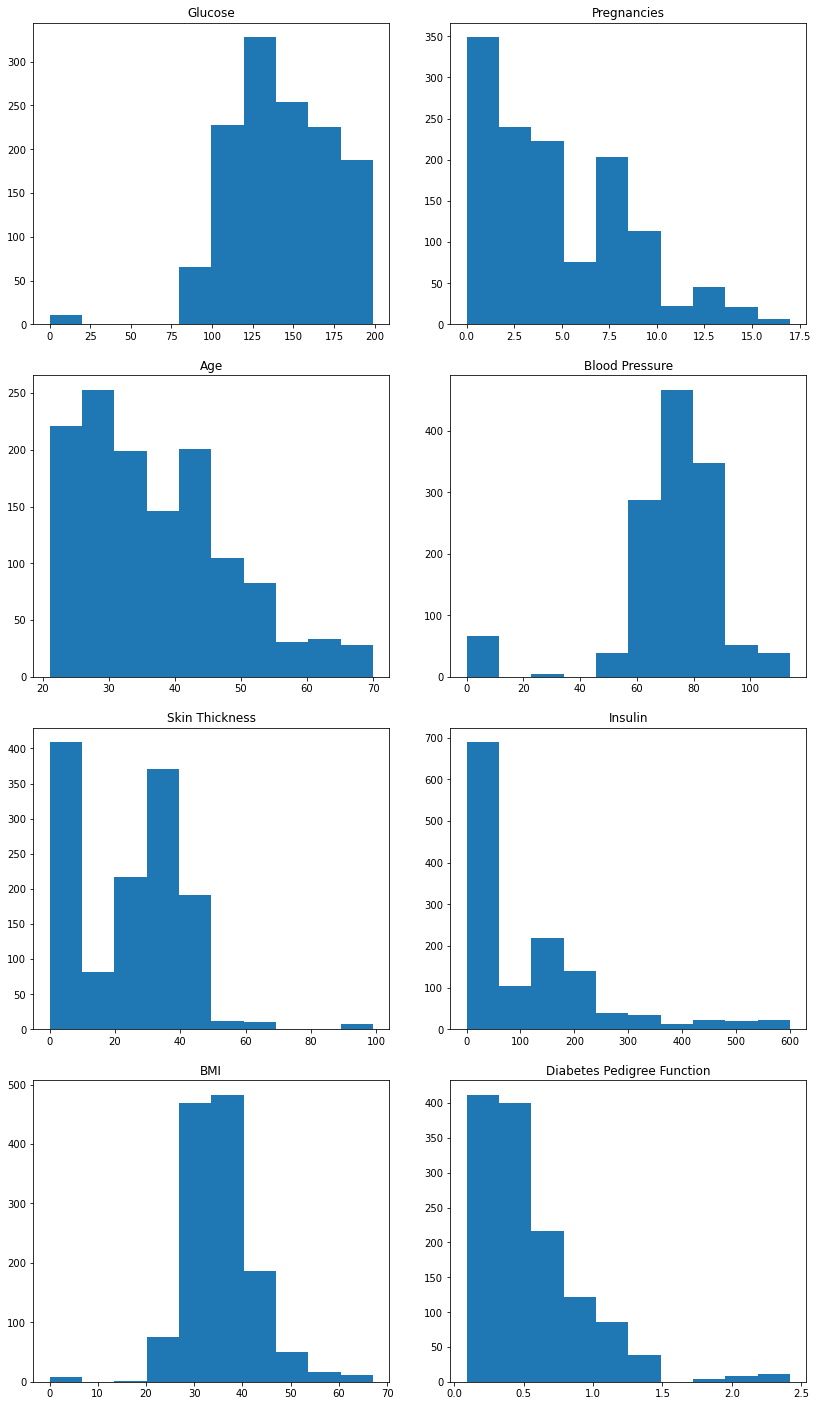

In [32]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

##  Make our correlation matrix visual 

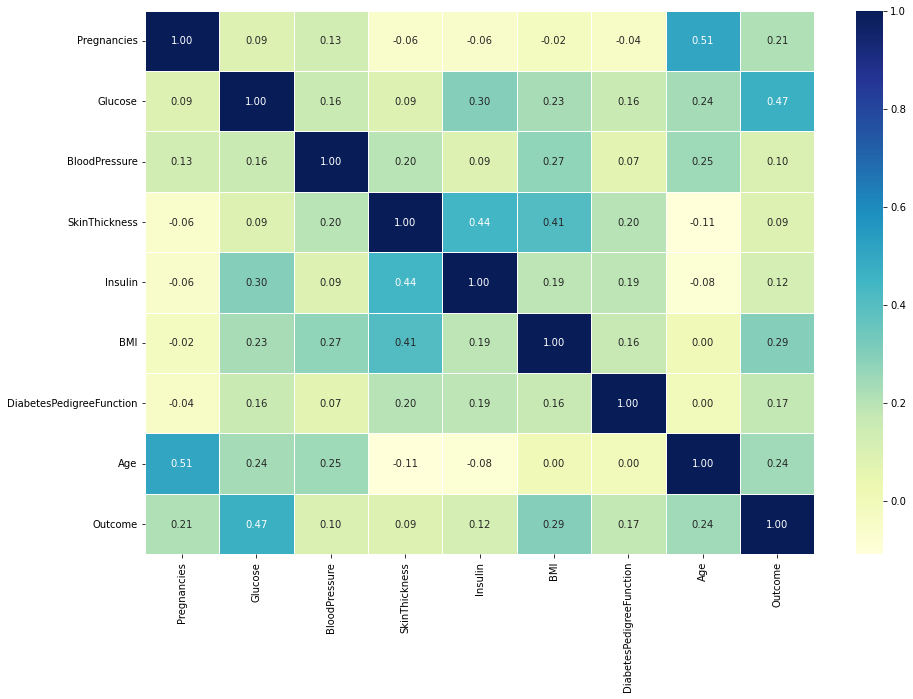

In [33]:
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## Check Null Values In The Dataset


In [34]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Get Overall Statistics About The Dataset


In [35]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000
mean,3.893731,126.026376,69.995413,21.569954,85.197630,32.985894,0.494623,33.964832,0.496942
std,3.445198,33.048404,19.226157,16.786218,119.433697,8.263862,0.350048,11.861514,0.500086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,28.000000,0.256000,25.000000,0.000000
50%,3.000000,123.000000,72.000000,24.000000,36.000000,32.800000,0.389000,30.000000,0.000000
75%,6.000000,147.000000,80.000000,33.000000,135.000000,37.400000,0.647500,41.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


## To Know count of zeros in columns

In [36]:
data_copy = data.copy(deep=True)

In [37]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

In [39]:
data_copy.isnull().sum()

Pregnancies                    0
Glucose                       18
BloodPressure                117
SkinThickness                763
Insulin                     1269
BMI                           33
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

## Replace zero by mean

In [40]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

## Split The Dataset Into input and ouput

In [41]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [42]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
296,2,146.0,70.000000,38.000000,360.00000,28.0,0.337,29
1274,5,124.0,74.000000,21.569954,85.19763,34.0,0.220,38
792,0,124.0,70.000000,20.000000,85.19763,27.4,0.254,36
303,5,115.0,98.000000,21.569954,85.19763,52.9,0.209,28
216,5,109.0,62.000000,41.000000,129.00000,35.8,0.514,25
...,...,...,...,...,...,...,...,...
1993,2,87.0,69.995413,23.000000,85.19763,28.9,0.773,25
1994,1,79.0,60.000000,42.000000,48.00000,43.5,0.678,23
1995,2,75.0,64.000000,24.000000,55.00000,29.7,0.370,33
1997,6,85.0,78.000000,21.569954,85.19763,31.2,0.382,42


## Splitting The Dataset Into The Training Set And Test Set

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)


## Scaling data

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [45]:
X_train .shape

(2092, 8)

In [46]:
X_test.shape

(524, 8)

# Modeling : 

## LogisticRegression

In [47]:
lr=LogisticRegression(C=100)
lr=lr.fit(X_train,y_train)

In [48]:
lr.score(X_train,y_train)

0.7480879541108987

In [49]:
lr_score = lr.score(X_test,y_test)
lr_score

0.7614503816793893

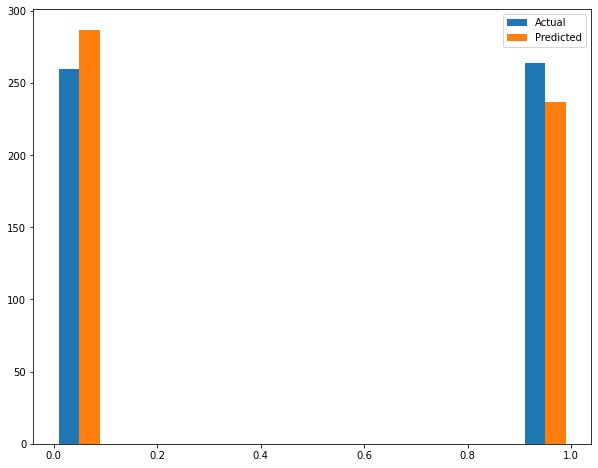

In [50]:
y_pre = lr.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pre})
plt.figure(figsize=(10,8))
plt.hist(df)
plt.legend(["Actual" , "Predicted"])

## KNN Classifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
knn.score(X_train,y_train)

0.9335564053537285

In [53]:
knn_score = knn.score(X_test,y_test)
knn_score

0.8683206106870229

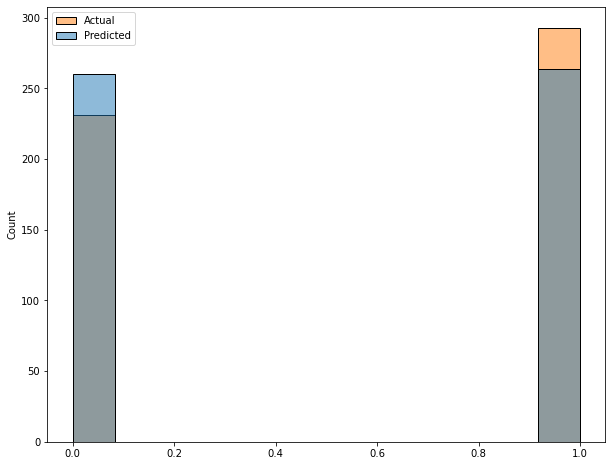

In [54]:
y_pre = knn.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pre})
plt.figure(figsize=(10,8))
sns.histplot(df)
plt.legend(["Actual" , "Predicted"])

## Decision tree

In [55]:
dt=DecisionTreeClassifier(max_features=8 , max_depth=12)

In [56]:
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=12, max_features=8)

In [57]:
dt_score = dt.score(X_train,y_train)
dt_score

0.9722753346080306

In [58]:
dt.score(X_test,y_test)

0.8893129770992366

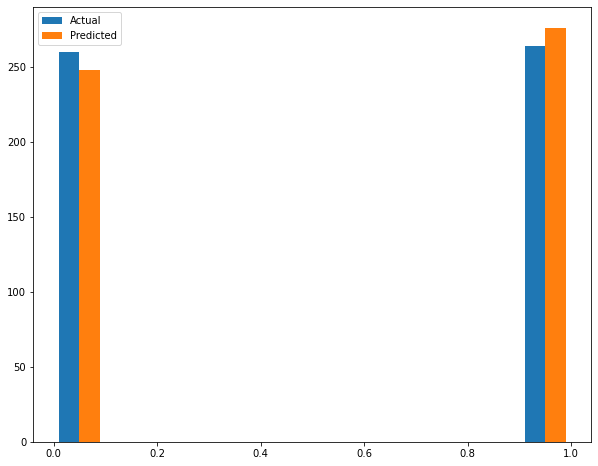

In [59]:
y_pre = dt.predict(X_test)
df = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pre})
plt.figure(figsize=(10,8))
plt.hist(df)
plt.legend(["Actual" , "Predicted"])

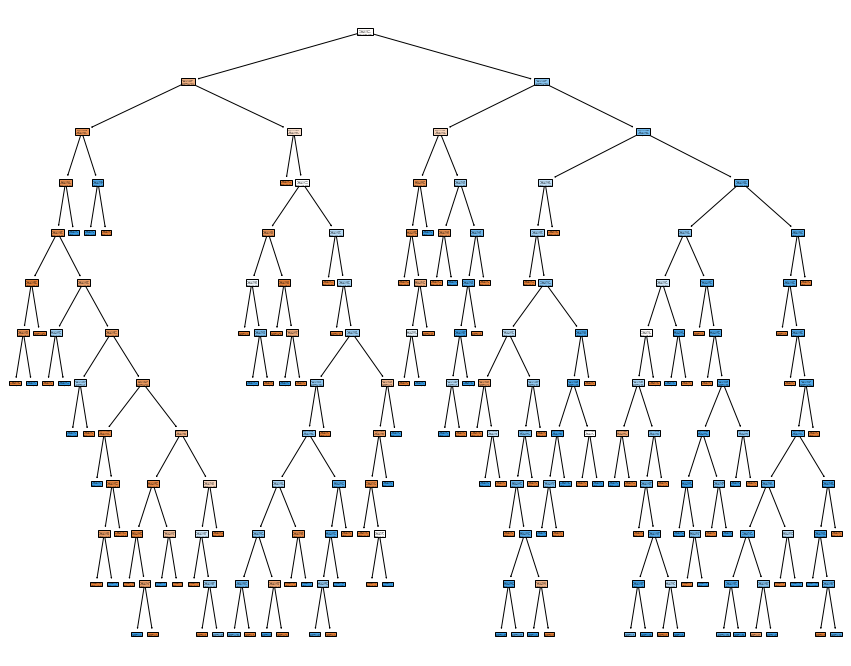

In [60]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)
plt.show()

## Compersion between models

In [61]:
models = ['logistic Regression' , 'knn','decision tree']
accur = [[lr_score] , [knn_score],[dt_score]]
cols = ["score"]
pd.DataFrame(data = accur , index = models , columns = cols)

,score
logistic Regression,0.761450
knn,0.868321
decision tree,0.972275


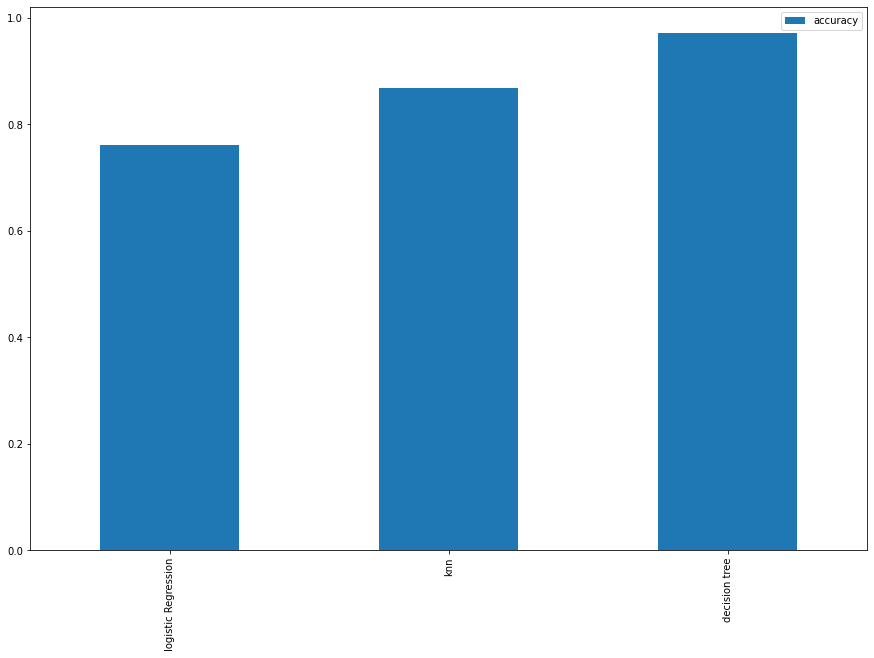

In [62]:
acc_results = {'logistic Regression': lr_score,
                            'knn': knn_score,
                            'decision tree': dt_score}
model_compare = pd.DataFrame(acc_results,index=["accuracy"])
model_compare.T.plot.bar(figsize=(15,10));

## Prediction on New Data 

In [63]:
new_data = pd.DataFrame({
    'Pregnancies':0,
    'Glucose':84,
    'BloodPressure':82.0,
    'SkinThickness':31,
    'Insulin':125,
    'BMI':38.2,
    'DiabetesPedigreeFunction':0.233,
    'Age':23,    
},index=[0])

In [64]:
p = dt.predict(new_data)

In [65]:
if p[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')

non-diabetic


## Save Model Using Joblib 

In [66]:
import joblib

In [67]:
joblib.dump(dt,'model_joblib_diabetes')

['model_joblib_diabetes']

In [68]:
model = joblib.load('model_joblib_diabetes')

In [326]:
model.predict(new_data)

array([0], dtype=int64)

## GUI 

In [327]:
from tkinter import *
import joblib

In [385]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
   
    model = joblib.load('model_joblib_diabetes')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8]])
    
    if result == 0:
        Label(master, text="Non-Diabetic").grid(row=31)
    else:
        Label(master, text="Diabetic").grid(row=31)
    
    
master = Tk()
master.title("Diabetes Prediction Using Machine Learning")


label = Label(master, text = "Diabetes Prediction Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Pregnancies").grid(row=1)
Label(master, text="Glucose").grid(row=2)
Label(master, text="Enter Value of BloodPressure").grid(row=3)
Label(master, text="Enter Value of SkinThickness").grid(row=4)
Label(master, text="Enter Value of Insulin").grid(row=5)
Label(master, text="Enter Value of BMI").grid(row=6)
Label(master, text="Enter Value of DiabetesPedigreeFunction").grid(row=7)
Label(master, text="Enter Value of Age").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)


Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()